## Glacier Flowlines

OGGM's default dynamic model is a flowline model (we'll cover this in session 05). But before we can use this model, we need to define flowlines for our glacier. OGGM supports two types of flowlines: centerlines and elevation band flowlines.

In this notebook, we will focus only on elevation band flowlines, which are currently the default in OGGM. If you are curious about the differences between the two approaches, check out this [OGGM tutorial](https://tutorials.oggm.org/stable/notebooks/tutorials/elevation_bands_vs_centerlines.html) or the [OGGM documentation](https://docs.oggm.org/en/stable/flowlines.html).

In [1]:
# first we import the packages we need for this session
from oggm import cfg, utils, workflow, tasks 

## OGGM initzial set up

As always, we need to start by setting up the working directory.

In [2]:
cfg.initialize()

# define working directory
path = 'flowline_working_dir'
utils.mkdir(path, reset=False)  # if you set reset=True, everything will be deleted and you can start from a fresh state
cfg.PATHS['working_dir'] = path

2025-03-31 10:49:16: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-03-31 10:49:16: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-03-31 10:49:16: oggm.cfg: Multiprocessing: using all available processors (N=8)


## Start from a preprocessed directory

Thanks to the preprocessed directories, we don’t need to start from scratch every time. We can begin with any glacier using the state we created in the last notebook, which already includes the 2D grid and DEM. For this, we select level 1 of the [preprocessed directories](https://docs.oggm.org/en/stable/shop.html#pre-processed-directories).

In [3]:
# select the glacier of your choice, you can use the Glims viewer from the first session
rgi_ids = ['RGI60-11.00897']  # Hintereisferner

# we load the outline data from the oggm cluster
prepro_base_url_L1 = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L1-L2_files/elev_bands/'
gdirs = workflow.init_glacier_directories(rgi_ids,
                                          from_prepro_level=1,  # here we select level 1
                                          prepro_base_url=prepro_base_url_L1,
                                          prepro_border=80,  # could be 10, 80, 160 or 240
                                         )
gdir = gdirs[0]  # for convenience, we define a single variable for our glacier

2025-03-31 10:49:16: oggm.workflow: init_glacier_directories from prepro level 1 on 1 glaciers.
2025-03-31 10:49:16: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers


<div class="alert alert-warning">
    <b>Task</b>: Take a look in your glacier’s working directory. Do you recognize all the files?
</div>

## Create elevation band flowlines

Before we start coding, please read [this paragraph](https://docs.oggm.org/en/stable/flowlines.html#elevation-bands-flowlines) that explains how elevation band flowlines are created.

<div class="alert alert-warning">
    <b>Task</b>: Can you explain how elevation bands are created in your own words?
</div>

Your answer here:


### Glacier Mask

Now we start creating the actual elevation bands for our selected glacier. The first step is to create a glacier mask on the grid we defined earlier.

In [4]:
workflow.execute_entity_task(tasks.simple_glacier_masks, 
                             gdirs);

2025-03-31 10:49:16: oggm.workflow: Execute entity tasks [simple_glacier_masks] on 1 glaciers
2025-03-31 10:49:16: oggm.core.gis: (RGI60-11.00897) simple_glacier_masks
2025-03-31 10:49:16: oggm.core.gis: (RGI60-11.00897) process_dem


<div class="alert alert-warning">
    <b>Task</b>: Have a look in your glacier's working directory. Is their a new file?
</div>

Now you should now see a new file called `gridded_data.nc`. Let's have a look at it:

In [5]:
import xarray as xr

ds = xr.open_dataset(gdir.get_filepath('gridded_data'))
ds

<xarray.Dataset> Size: 720kB
Dimensions:          (x: 279, y: 234)
Coordinates:
  * x                (x) float32 1kB -6.517e+03 -6.467e+03 ... 7.383e+03
  * y                (y) float32 936B 5.189e+06 5.189e+06 ... 5.177e+06
Data variables:
    topo             (y, x) float32 261kB ...
    topo_smoothed    (y, x) float32 261kB ...
    topo_valid_mask  (y, x) int8 65kB ...
    glacier_mask     (y, x) int8 65kB ...
    glacier_ext      (y, x) int8 65kB ...
Attributes:
    author:         OGGM
    author_info:    Open Global Glacier Model
    pyproj_srs:     +proj=tmerc +lat_0=0 +lon_0=10.7584 +k=0.9996 +x_0=0 +y_0...
    max_h_dem:      3691.0
    min_h_dem:      1936.0
    max_h_glacier:  3691.0
    min_h_glacier:  2431.0

We also can plot individual variables with:

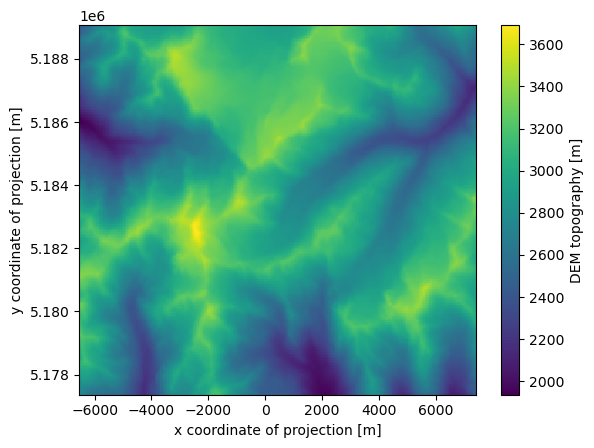

In [6]:
ds.topo.plot()

<div class="alert alert-warning">
    <b>Task</b>: Plot all the variables by adapting the line of code above, and try to explain what each of them is showing.
</div>

Your answer here:


### elevation band flowline

Finally, we create our elevation band flowline:

In [7]:
workflow.execute_entity_task(tasks.elevation_band_flowline, 
                             gdirs);

2025-03-31 10:49:17: oggm.workflow: Execute entity tasks [elevation_band_flowline] on 1 glaciers
2025-03-31 10:49:17: oggm.core.centerlines: (RGI60-11.00897) elevation_band_flowline


<div class="alert alert-warning">
    <b>Task</b>: Have a look in your glacier's working directory. Is their a new file?
</div>

You should see a new file called `elevation_band_flowline.csv`. Let's have a look at it:

In [8]:
import pandas as pd

df_eb = pd.read_csv(gdir.get_filepath('elevation_band_flowline'))
df_eb

,dis_along_flowline,area,mean_elevation,slope,bin_elevation,dx,width
0,58.782017,45000.0,3642.9340,0.249848,3645.0,117.564030,382.770127
1,145.106220,42500.0,3615.6875,0.498703,3615.0,55.084373,771.543676
2,197.212231,35000.0,3583.8884,0.548217,3585.0,49.127650,712.429744
3,245.276493,20000.0,3555.7450,0.568096,3555.0,47.000877,425.523971
4,289.617252,20000.0,3527.1010,0.623864,3525.0,41.680637,479.839112
5,331.036068,25000.0,3496.5723,0.629870,3495.0,41.156994,607.430175
6,389.333172,52500.0,3459.0107,0.378506,3465.0,75.437210,695.943023
7,461.008892,90000.0,3432.8930,0.415958,3435.0,67.914240,1325.200763
8,526.511395,107500.0,3405.7708,0.443861,3405.0,63.090767,1703.894330
9,592.245770,162500.0,3375.2360,0.413449,3375.0,68.377980,2376.495952


<div class="alert alert-warning">
    <b>Task</b>: What do the individual columns stand for?
</div>

Your answer here: 

### fixed dx elevation band flowline

As you can see above, the created flowline has non-uniform `dx` values. However, our dynamic flowline model requires constant `dx` values to work. Let’s fix that:

In [9]:
workflow.execute_entity_task(tasks.fixed_dx_elevation_band_flowline, 
                             gdirs);

2025-03-31 10:49:17: oggm.workflow: Execute entity tasks [fixed_dx_elevation_band_flowline] on 1 glaciers
2025-03-31 10:49:17: oggm.core.centerlines: (RGI60-11.00897) fixed_dx_elevation_band_flowline


<div class="alert alert-warning">
    <b>Task</b>: Have a look in your glacier's working directory. Is their a new file?
</div>

You will notice that a new file called `inversion_flowlines.pkl` has appeared in your working directory. We will explain why it is named this way in session 04. For now, let’s just take a look at it:

In [10]:
fl_inv = gdir.read_pickle('inversion_flowlines')[0]  # with zero we select the first and only flowline, with centerlines also multiple flowlines are possible
fl_inv

You can see that this is an `Centerline` object. Whenever you encounter a new object in Python, you can check its available methods and properties using the dir command:

In [11]:
dir(fl_inv)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_surface_h',
 '_widths',
 'apparent_mb',
 'dis_on_line',
 'dx',
 'dx_meter',
 'flows_to',
 'flows_to_indice',
 'flows_to_point',
 'flux',
 'flux_needs_correction',
 'flux_out',
 'geometrical_widths',
 'head',
 'inflow_indices',
 'inflow_points',
 'inflows',
 'is_rectangular',
 'is_trapezoid',
 'line',
 'map_dx',
 'normals',
 'nx',
 'order',
 'orig_head',
 'reset_flux',
 'rgi_id',
 'set_apparent_mb',
 'set_flows_to',
 'set_line',
 'surface_h',
 'tail',
 'widths',
 'widths_m']

To get a better understanding of our flowline, let’s try to visualize it:

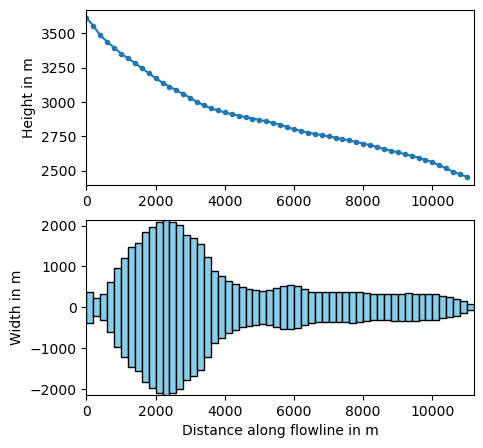

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Plot setup
fig, axs = plt.subplots(2, 1, figsize=(5, 5))

# defint two axis
ax_xz = axs[0]
ax_xy = axs[1]

# define grid points in x direction
distance_along_line_meter = fl_inv.dis_on_line * fl_inv.dx_meter

# plot the surface height per grid point
ax_xz.plot(distance_along_line_meter, fl_inv.surface_h, '.-')

# plot the numeric gird per grid point
for x, width in zip(distance_along_line_meter, fl_inv.widths_m):
    lower_left_y = (-1) * width / 2
    rect = patches.Rectangle((x, lower_left_y), fl_inv.dx_meter * fl_inv.dx, width,
                             edgecolor='black', facecolor='skyblue')
    ax_xy.add_patch(rect)

# define the axis limits
ax_xy.set_xlim(0, distance_along_line_meter[-1] + fl_inv.dx_meter * fl_inv.dx)
ax_xz.set_xlim(0, distance_along_line_meter[-1] + fl_inv.dx_meter * fl_inv.dx)
ax_xy.set_ylim(-max(fl_inv.widths_m/2),
               max(fl_inv.widths_m/2))

# add labels to the axis
ax_xz.set_ylabel('Height in m')
ax_xy.set_ylabel('Width in m')
ax_xy.set_xlabel('Distance along flowline in m')

plt.show()


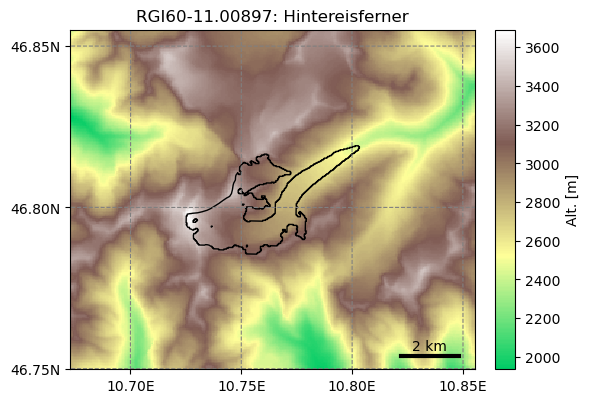

In [13]:
from oggm import graphics
graphics.plot_domain(gdir, figsize=(6, 5))

<div class="alert alert-warning">
    <b>Task</b>: Compare the flowline representation with the actual map view. Does it make sense?
</div>

Your answer here:

### Downstream line

So far, we have only focused on the glacier as defined by its outline. But what happens if the glacier starts to grow? For that, we also need to define a downstream line:

In [14]:
workflow.execute_entity_task(tasks.compute_downstream_line,
                             gdirs);
workflow.execute_entity_task(tasks.compute_downstream_bedshape,
                             gdirs);

2025-03-31 10:49:18: oggm.workflow: Execute entity tasks [compute_downstream_line] on 1 glaciers
2025-03-31 10:49:18: oggm.core.centerlines: (RGI60-11.00897) compute_downstream_line
2025-03-31 10:49:18: oggm.workflow: Execute entity tasks [compute_downstream_bedshape] on 1 glaciers
2025-03-31 10:49:18: oggm.core.centerlines: (RGI60-11.00897) compute_downstream_bedshape


<div class="alert alert-warning">
    <b>Task</b>: Have a look in your glacier's working directory. Is their a new file?
</div>

You’ll see that a new file called `downstream_line.pkl` has appeared in your working directory. Let’s take a look at it:

In [15]:
dwn = gdir.read_pickle('downstream_line')
dwn

{'full_line': None,
 'downstream_line': <LINESTRING (198 80, 199.414 78.586, 201.236 77.764, 203.057 76.943, 204.471...>,
 'bedshapes': array([0.00175559, 0.00182948, 0.00182114, 0.00190027, 0.00191281,
        0.00187244, 0.00180151, 0.00176664, 0.00167555, 0.00157336,
        0.00148882, 0.00143702, 0.00143408, 0.0014905 , 0.00156056,
        0.00168466, 0.0017831 , 0.00187688, 0.0019179 , 0.00193848,
        0.00188207, 0.00179669, 0.001698  , 0.00166098, 0.00164769,
        0.00165895, 0.0017144 , 0.00174694, 0.00175113, 0.0017223 ,
        0.00172459, 0.00172227, 0.0017408 , 0.00179838, 0.00187522,
        0.00191519, 0.00195211, 0.00197681, 0.00196096, 0.00195304,
        0.00195304, 0.00195304, 0.00195304, 0.00195304, 0.00195304,
        0.00195304, 0.00195304, 0.00195304, 0.00195304]),
 'surface_h': array([2438.46057411, 2431.6336777 , 2424.00141571, 2418.21042777,
        2413.13438558, 2407.82282821, 2402.3426577 , 2397.01513784,
        2392.35993349, 2388.84528176, 2385.900

When you compare the `surface_h` values of the downstream line with those from the elevation band flowline above, you will see that they actually start where the flowline ends. Let's plot them:

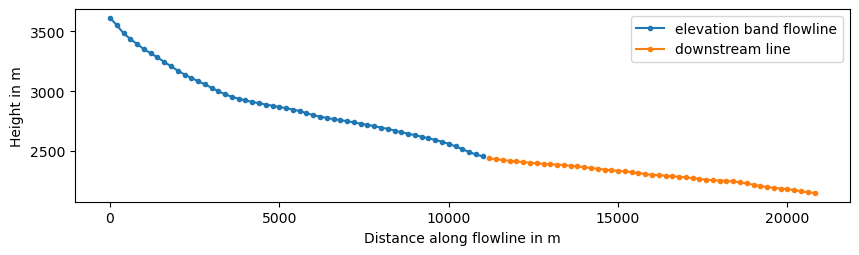

In [16]:
fig, ax = plt.subplots(figsize=(10, 2.5))

# plot the elevation band flowline heights
ax.plot(fl_inv.dis_on_line * fl_inv.dx_meter, fl_inv.surface_h, '.-', label='elevation band flowline')

# we need to create x values for the downstream line, we start from the last elevation band flowline grid point
last_eb_grid_point = fl_inv.dis_on_line[-1] * fl_inv.dx_meter
downstream_x = np.arange(1, len(dwn['surface_h']) + 1) * fl_inv.dx_meter * fl_inv.dx + last_eb_grid_point

# plot the downstream heights
ax.plot(downstream_x, dwn['surface_h'], '.-', label='downstream line')

# add a legend
ax.legend()

# add axis labels
ax.set_ylabel('Height in m')
ax.set_xlabel('Distance along flowline in m');

Additionally, the parameters `bedshapes` and `w0` define the shape of the downstream line. We’ll learn more about the different bed shapes in session 04.

## Recap

- By default, OGGM uses elevation band flowlines.
- These flowlines are created using the glacier outline and a Digital Elevation Model (DEM).
- To allow glaciers to advance, we also defined a downstream line.